## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  64.052744   824.161879  0.840785  8.761680   695.867293
1  26.942856  1439.238641  0.012644  1.951284    32.611675
2  75.541472  1110.580111  0.123723  1.630471   156.760218
3  75.123068   337.954215  0.936558  6.672318   325.405775
4  49.534189  1692.928808  0.903452  3.742706  1530.249634


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9710811	total: 57.1ms	remaining: 57s
1:	learn: 0.9581667	total: 57.4ms	remaining: 28.7s
2:	learn: 0.9480710	total: 58ms	remaining: 19.3s
3:	learn: 0.9363445	total: 58.6ms	remaining: 14.6s
4:	learn: 0.9250164	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9130697	total: 59.7ms	remaining: 9.9s
6:	learn: 0.9004735	total: 60.2ms	remaining: 8.54s
7:	learn: 0.8880820	total: 60.8ms	remaining: 7.54s
8:	learn: 0.8760552	total: 61.4ms	remaining: 6.76s
9:	learn: 0.8623958	total: 61.8ms	remaining: 6.12s
10:	learn: 0.8517326	total: 62.4ms	remaining: 5.61s
11:	learn: 0.8397556	total: 62.9ms	remaining: 5.18s
12:	learn: 0.8291881	total: 63.3ms	remaining: 4.8s
13:	learn: 0.8171985	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8063564	total: 64.4ms	remaining: 4.23s
15:	learn: 0.7965592	total: 64.8ms	remaining: 3.99s
16:	learn: 0.7861661	total: 65.3ms	remaining: 3.77s
17:	learn: 0.7747479	total: 65.7ms	remaining: 3.59s
18:	learn: 0.7668002	total: 66.3ms	remaining: 3.42s

114:	learn: 0.2437620	total: 106ms	remaining: 819ms
115:	learn: 0.2413968	total: 107ms	remaining: 815ms
116:	learn: 0.2383478	total: 107ms	remaining: 810ms
117:	learn: 0.2357218	total: 108ms	remaining: 806ms
118:	learn: 0.2329582	total: 108ms	remaining: 802ms
119:	learn: 0.2305965	total: 109ms	remaining: 797ms
120:	learn: 0.2278907	total: 109ms	remaining: 793ms
121:	learn: 0.2260941	total: 110ms	remaining: 788ms
122:	learn: 0.2242517	total: 110ms	remaining: 784ms
123:	learn: 0.2216554	total: 110ms	remaining: 779ms
124:	learn: 0.2203940	total: 111ms	remaining: 775ms
125:	learn: 0.2183991	total: 111ms	remaining: 770ms
126:	learn: 0.2160201	total: 111ms	remaining: 766ms
127:	learn: 0.2135761	total: 112ms	remaining: 762ms
128:	learn: 0.2118090	total: 112ms	remaining: 757ms
129:	learn: 0.2097518	total: 112ms	remaining: 753ms
130:	learn: 0.2076597	total: 113ms	remaining: 749ms
131:	learn: 0.2058651	total: 113ms	remaining: 745ms
132:	learn: 0.2037553	total: 114ms	remaining: 742ms
133:	learn: 

302:	learn: 0.0517030	total: 185ms	remaining: 425ms
303:	learn: 0.0514101	total: 185ms	remaining: 424ms
304:	learn: 0.0510733	total: 186ms	remaining: 424ms
305:	learn: 0.0508169	total: 186ms	remaining: 423ms
306:	learn: 0.0505369	total: 187ms	remaining: 422ms
307:	learn: 0.0502453	total: 187ms	remaining: 420ms
308:	learn: 0.0499673	total: 188ms	remaining: 420ms
309:	learn: 0.0496812	total: 188ms	remaining: 419ms
310:	learn: 0.0493274	total: 188ms	remaining: 417ms
311:	learn: 0.0489936	total: 189ms	remaining: 416ms
312:	learn: 0.0487389	total: 189ms	remaining: 416ms
313:	learn: 0.0484766	total: 190ms	remaining: 415ms
314:	learn: 0.0480839	total: 190ms	remaining: 413ms
315:	learn: 0.0478147	total: 190ms	remaining: 412ms
316:	learn: 0.0475615	total: 191ms	remaining: 411ms
317:	learn: 0.0472981	total: 191ms	remaining: 410ms
318:	learn: 0.0470329	total: 192ms	remaining: 409ms
319:	learn: 0.0467678	total: 192ms	remaining: 409ms
320:	learn: 0.0465252	total: 193ms	remaining: 407ms
321:	learn: 

537:	learn: 0.0175210	total: 289ms	remaining: 248ms
538:	learn: 0.0174289	total: 290ms	remaining: 248ms
539:	learn: 0.0173419	total: 290ms	remaining: 247ms
540:	learn: 0.0172756	total: 290ms	remaining: 246ms
541:	learn: 0.0171856	total: 291ms	remaining: 246ms
542:	learn: 0.0170965	total: 291ms	remaining: 245ms
543:	learn: 0.0170089	total: 292ms	remaining: 244ms
544:	learn: 0.0169156	total: 292ms	remaining: 244ms
545:	learn: 0.0168278	total: 292ms	remaining: 243ms
546:	learn: 0.0167428	total: 293ms	remaining: 242ms
547:	learn: 0.0166851	total: 293ms	remaining: 242ms
548:	learn: 0.0166021	total: 294ms	remaining: 241ms
549:	learn: 0.0165459	total: 294ms	remaining: 241ms
550:	learn: 0.0164581	total: 294ms	remaining: 240ms
551:	learn: 0.0163873	total: 295ms	remaining: 239ms
552:	learn: 0.0163328	total: 295ms	remaining: 239ms
553:	learn: 0.0162644	total: 296ms	remaining: 238ms
554:	learn: 0.0162035	total: 296ms	remaining: 237ms
555:	learn: 0.0161231	total: 297ms	remaining: 237ms
556:	learn: 

719:	learn: 0.0086041	total: 367ms	remaining: 143ms
720:	learn: 0.0085827	total: 368ms	remaining: 142ms
721:	learn: 0.0085591	total: 368ms	remaining: 142ms
722:	learn: 0.0085189	total: 368ms	remaining: 141ms
723:	learn: 0.0084786	total: 369ms	remaining: 141ms
724:	learn: 0.0084414	total: 369ms	remaining: 140ms
725:	learn: 0.0084128	total: 370ms	remaining: 140ms
726:	learn: 0.0083928	total: 370ms	remaining: 139ms
727:	learn: 0.0083707	total: 370ms	remaining: 138ms
728:	learn: 0.0083291	total: 371ms	remaining: 138ms
729:	learn: 0.0083089	total: 371ms	remaining: 137ms
730:	learn: 0.0082706	total: 372ms	remaining: 137ms
731:	learn: 0.0082436	total: 372ms	remaining: 136ms
732:	learn: 0.0082031	total: 372ms	remaining: 136ms
733:	learn: 0.0081840	total: 373ms	remaining: 135ms
734:	learn: 0.0081580	total: 373ms	remaining: 135ms
735:	learn: 0.0081341	total: 374ms	remaining: 134ms
736:	learn: 0.0080971	total: 374ms	remaining: 134ms
737:	learn: 0.0080786	total: 375ms	remaining: 133ms
738:	learn: 

959:	learn: 0.0038394	total: 471ms	remaining: 19.6ms
960:	learn: 0.0038243	total: 472ms	remaining: 19.2ms
961:	learn: 0.0038083	total: 473ms	remaining: 18.7ms
962:	learn: 0.0038059	total: 473ms	remaining: 18.2ms
963:	learn: 0.0037916	total: 473ms	remaining: 17.7ms
964:	learn: 0.0037893	total: 474ms	remaining: 17.2ms
965:	learn: 0.0037873	total: 474ms	remaining: 16.7ms
966:	learn: 0.0037828	total: 474ms	remaining: 16.2ms
967:	learn: 0.0037699	total: 475ms	remaining: 15.7ms
968:	learn: 0.0037680	total: 475ms	remaining: 15.2ms
969:	learn: 0.0037661	total: 476ms	remaining: 14.7ms
970:	learn: 0.0037639	total: 476ms	remaining: 14.2ms
971:	learn: 0.0037450	total: 477ms	remaining: 13.7ms
972:	learn: 0.0037430	total: 477ms	remaining: 13.2ms
973:	learn: 0.0037410	total: 477ms	remaining: 12.7ms
974:	learn: 0.0037391	total: 478ms	remaining: 12.3ms
975:	learn: 0.0037206	total: 478ms	remaining: 11.8ms
976:	learn: 0.0037187	total: 479ms	remaining: 11.3ms
977:	learn: 0.0037031	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

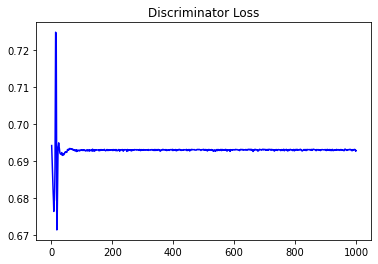

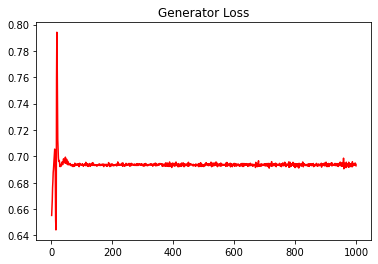

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.016335761555953336


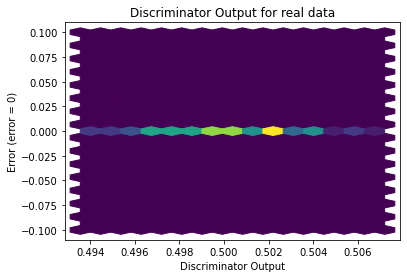

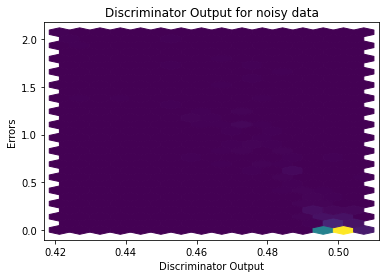

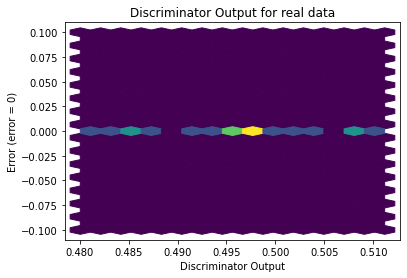

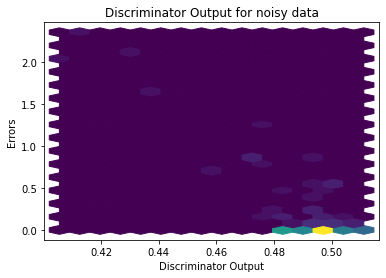

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


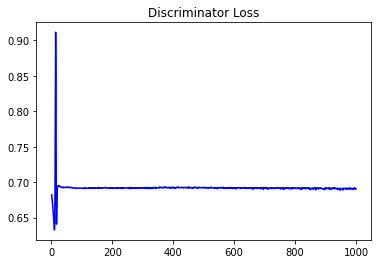

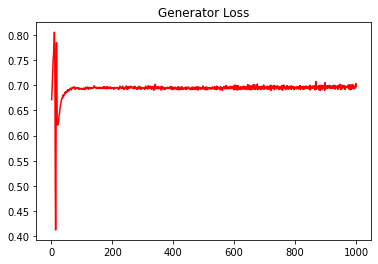

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.01626102554430007


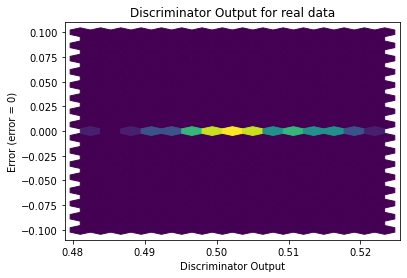

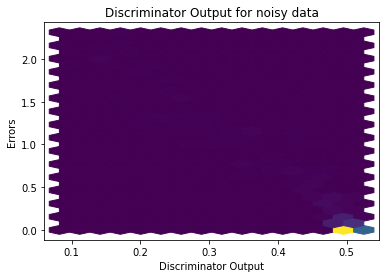

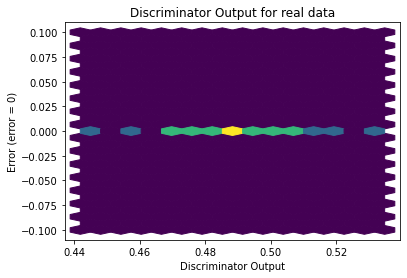

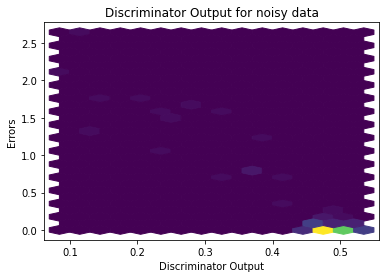

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0755]], requires_grad=True)
